# Descenso al fondo de un cráter en Marte
Diego Armando Mijares A01722421

Renata Garfias Núñez A01369860

Máximo Caballero Vargas A01571607

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generar matriz de mapa, visualizarlo, y voltear eje vertical

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Height map pre-processing
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------

import copy
import numpy as np
from skimage.transform import downscale_local_mean

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

import plotly.graph_objects as px

import numpy as np

#------------------------------------------------------------------------------------------------------------------
#   File names
#------------------------------------------------------------------------------------------------------------------
input_file = "/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/crater_map.IMG"
output_file = "crater_map.npy"

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Load map data
#------------------------------------------------------------------------------------------------------------------

data_file = open(input_file, "rb")

endHeader = False;
while not endHeader:
    line = data_file.readline().rstrip().lower()

    sep_line = line.split(b'=')

    if len(sep_line) == 2:
        itemName = sep_line[0].rstrip().lstrip()
        itemValue = sep_line[1].rstrip().lstrip()

        if itemName == b'valid_maximum':
            maxV = float(itemValue)
        elif itemName == b'valid_minimum':
            minV = float(itemValue)
        elif itemName == b'lines':
            n_rows = int(itemValue)
        elif itemName == b'line_samples':
            n_columns = int(itemValue)
        elif itemName == b'map_scale':
            scale_str = itemValue.split()
            if len(scale_str) > 1:
                scale = float(scale_str[0])

    elif line == b'end':
        endHeader = True
        char = 0
        while char == 0 or char == 32:
            char = data_file.read(1)[0]
        pos = data_file.seek(-1, 1)

image_size = n_rows*n_columns
data = data_file.read(4*image_size)

image_data = np.frombuffer(data, dtype=np.dtype('f'))
image_data = image_data.reshape((n_rows, n_columns))
image_data = np.array(image_data)
image_data = image_data.astype('float64')

image_data = image_data - minV;
image_data[image_data < -10000] = -1;

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Subsampling
#------------------------------------------------------------------------------------------------------------------
sub_rate = round(10/scale)

image_data = downscale_local_mean(image_data, (sub_rate, sub_rate))
image_data[image_data<0] = -1

print('Sub-sampling:', sub_rate)

new_scale = scale*sub_rate
print('New scale:', new_scale, 'meters/pixel')

Sub-sampling: 10
New scale: 10.045020712681001 meters/pixel


In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Save map
#------------------------------------------------------------------------------------------------------------------
#np.save(output_file, image_data)

In [ ]:
# AQUI HAZE DISCONNECT, SI CORRE, PERO NO MUESTRA LA FIGURA
# CORRER LOCAL, DA URL INTERACTIVO
#------------------------------------------------------------------------------------------------------------------
#   Show 3D surface
#------------------------------------------------------------------------------------------------------------------

x = new_scale*np.arange(image_data.shape[1])
y = new_scale*np.arange(image_data.shape[0])
X, Y = np.meshgrid(x, y)

fig = px.Figure(data = px.Surface(x=X, y=Y, z=np.flipud(image_data), colorscale='hot', cmin = 0,
                           lighting = dict(ambient = 0.0, diffuse = 0.8, fresnel = 0.02, roughness = 0.4, specular = 0.2),
                           lightposition=dict(x=0, y=n_rows/2, z=2*maxV)),

                layout = px.Layout(scene_aspectmode='manual',
                                   scene_aspectratio=dict(x=1, y=n_rows/n_columns, z=max((maxV-minV)/x.max(), 0.2)),
                                   scene_zaxis_range = [0,maxV-minV])
                )

fig.show()

Localmente te permite interactuar con un mapa así, lo puedes rotar, poner tu cursor en cualquier lugar y te da las coordenadas, etc:

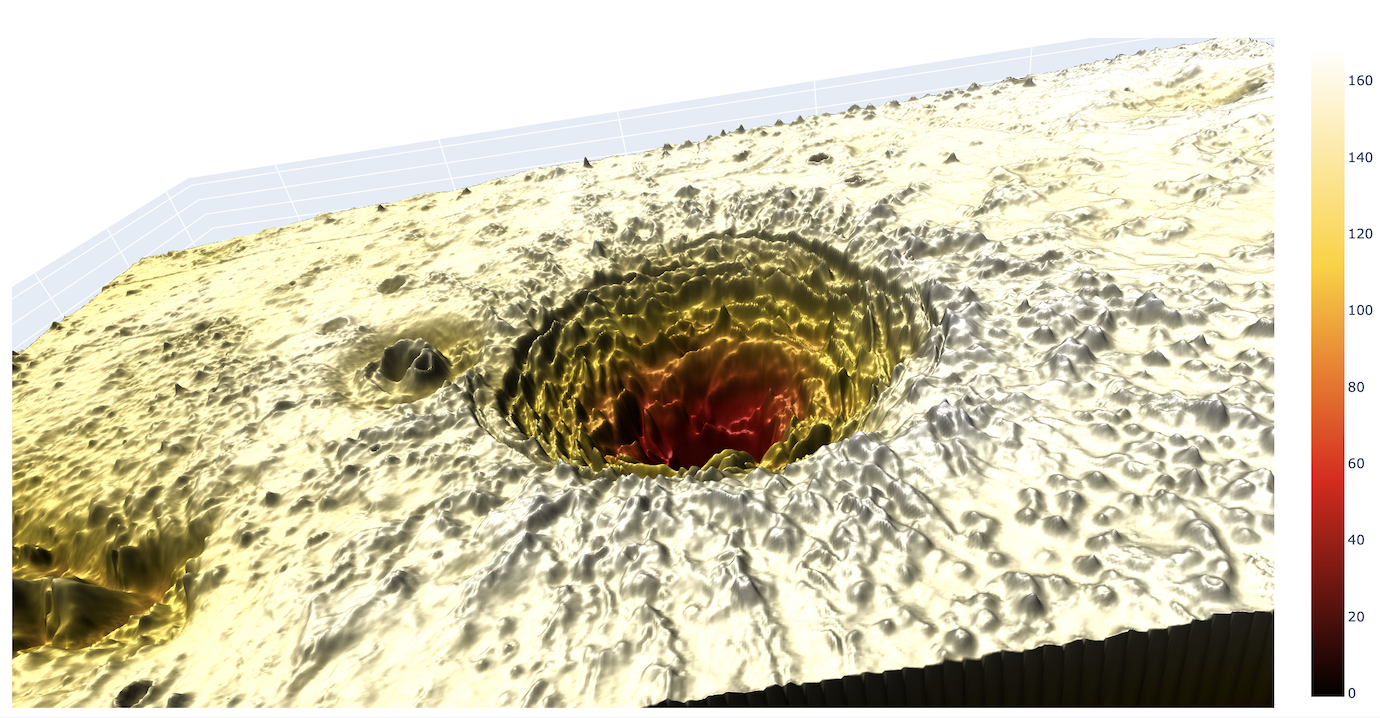

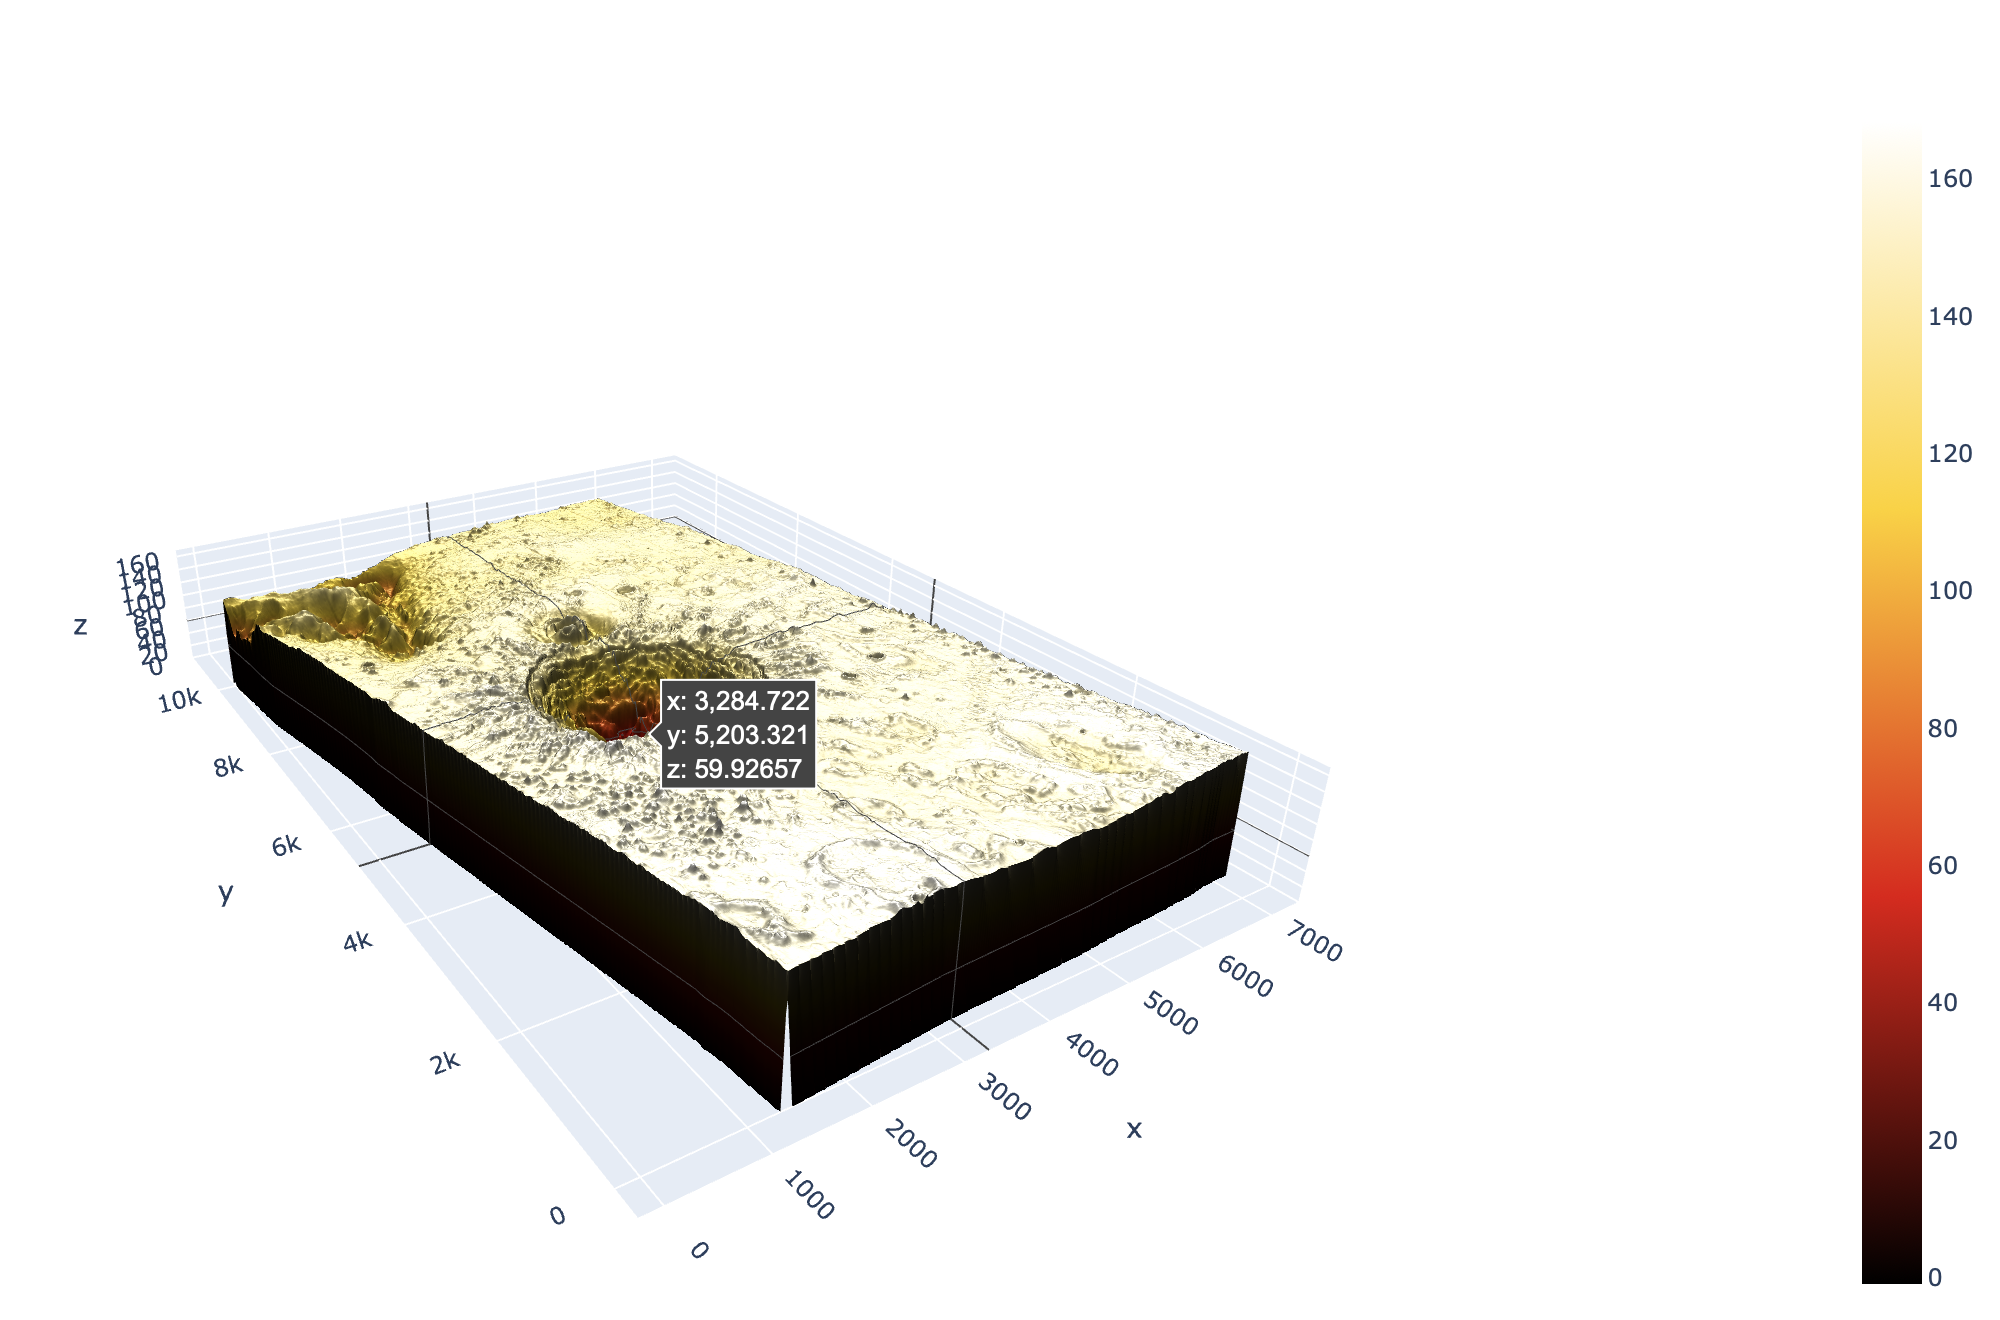

<ipython-input-7-6ba467421abf>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



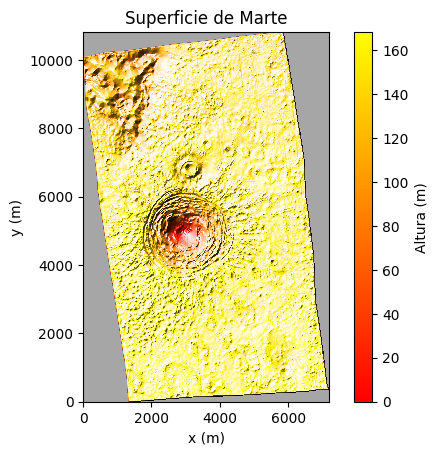

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Show surface image
#------------------------------------------------------------------------------------------------------------------

cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')

ls = LightSource(315, 45)
rgb = ls.shade(image_data, cmap=cmap, vmin = 0, vmax = image_data.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = image_data.max(),
                extent =[0, scale*n_columns, 0, scale*n_rows],
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

In [ ]:
# Cargar nuevo mapa
mars_map = np.load('/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/crater_map.npy')
nr, nc = mars_map.shape

In [ ]:
# Trasnformar a R y C
escala_instruccion = 10.045
nr_instruccion = 1814
r = nr_instruccion - np.round(y / escala_instruccion)
c = np.round(x / escala_instruccion)

#print('r calculado:', r)
#print('c calculado:', c)

#Importar Librerías

In [ ]:
import time
import random
import math
import numpy as np

# Búsqueda Codiciosa (Alpinista)

In [ ]:
#Variables

escala = 10.017  # escala para las coordenadas
mars_map = np.load('/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/crater_map.npy')  # Carga un mapa de Marte desde un archivo
nr, nc = mars_map.shape  # Obtiene las dimensiones del mapa de Marte
x = np.round(escala*np.arange(mars_map.shape[1]))  # Define un array de coordenadas x
y = np.round(escala*np.arange(mars_map.shape[0]))  # Define un array de coordenadas y
paso = 1  # Define un paso para los movimientos

In [ ]:
#Funciones

def obtener_altura(x, y):

  # Devuelve la altura en la posición (x, y) en el mapa de Marte.
  # Sólo recibe coordenabas matriciales

   # Args:
   # x: Coordenada x
   # y: Coordenada y

   # Returns:
   # Altura en la posición (x, y)"""

    return (mars_map[y][x])


def inicializar_BusquedaCodiciosa(xi, yi, altura_maxima):
    posicion_inicial = (xi, yi)
    altura_maxima = 2
    ruta = Ruta(posicion_inicial, altura_maxima)      # Inicializa la ruta

    costo = ruta.costo()
    #print(costo)# Costo inicial
    paso_actual = 0      # Contador de pasos

    vecino=[]
    vecino = ruta.vecino(altura_maxima)

    while costo > 0:
      paso_actual += 1
      # Obtiene el vecino con mejor costo
      vecino = ruta.vecino(altura_maxima)
      # print(vecino.posicion_inicial)
      nuevo_costo = vecino.costo()

      # Actualiza la ruta si el vecino es mejor
      if nuevo_costo < costo:
        ruta = vecino
        costo = nuevo_costo
      else:
        # Si no hay mejoras, se detiene el algoritmo
        break

    print("Altura final:", costo, " Iteraciones: ", paso_actual)


In [ ]:
class Ruta(object):

    #Clase que representa las rutas en un mapa.


    def __init__(self, posicion_inicial, altura_maxima):
       # Inicializa la ruta con una posición inicial y una altura máxima de cambio.

       # Args:
      #  posicion_inicial: Tupla que representa la posición inicial (x, y) y la altura z.
      #  altura_maxima: Altura máxima permitida para cambios en la ruta.

        r = nr-round(posicion_inicial[1]/escala)
        c = round(posicion_inicial[0]/escala)
        self.posicion_inicial = (c, r, obtener_altura(c, r))
        self.altura_maxima = altura_maxima


    def costo(self):

        #Calcula el costo de la solución (el número de posiciones con altura insegura).

        return self.posicion_inicial[2]

    def vecino(self,altura_maxima):
        #Devuelve una nueva instancia de Ruta con el vecino de mejor costo.

        vecinos=[]
        new_state = Ruta(self.posicion_inicial, self.altura_maxima)
        new_states = [1,2,3,4,5,6,7,8]
        for i in range(8):
            new_states[i] = Ruta(self.posicion_inicial, self.altura_maxima)

        #comparacion =  Ruta((self.posicion_inicial[0]-paso, self.posicion_inicial[1]), altura_maxima)
        for i in range(8):
            if i==0 and self.posicion_inicial[0]>0 and abs(obtener_altura(self.posicion_inicial[0]-paso, self.posicion_inicial[1])- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0]-paso, self.posicion_inicial[1])
                new_states[i].posicion_inicial = (self.posicion_inicial[0]-paso, self.posicion_inicial[1], altura)
                vecinos.append(new_states[i])

            elif i==1 and self.posicion_inicial[0]<nc and abs(obtener_altura(self.posicion_inicial[0]+paso, self.posicion_inicial[1])- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0]+paso, self.posicion_inicial[1])
                new_states[i].posicion_inicial = (self.posicion_inicial[0]+paso, self.posicion_inicial[1], altura)
                vecinos.append(new_states[i])

            elif i==2 and self.posicion_inicial[1]>0 and abs(obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]-paso)- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]-paso)
                new_states[i].posicion_inicial = (self.posicion_inicial[0], self.posicion_inicial[1]-paso, altura)
                vecinos.append(new_states[i])

            elif i==3 and self.posicion_inicial[1]<nr and abs(obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]+paso)- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]+paso)
                new_states[i].posicion_inicial = (self.posicion_inicial[0], self.posicion_inicial[1]+paso, altura)
                vecinos.append(new_states[i])

            elif i==4 and self.posicion_inicial[0]>0 and self.posicion_inicial[1]>0 and self.posicion_inicial[1]>0 and abs(obtener_altura(self.posicion_inicial[0]-paso, self.posicion_inicial[1]-paso)- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0]-paso, self.posicion_inicial[1]-paso)
                new_states[i].posicion_inicial = (self.posicion_inicial[0]-paso, self.posicion_inicial[1]-paso, altura)
                vecinos.append(new_states[i])


            elif i==5 and self.posicion_inicial[0]>0 and self.posicion_inicial[1]<nr and self.posicion_inicial[1]<nr and abs(obtener_altura(self.posicion_inicial[0]-paso, self.posicion_inicial[1]+paso)- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0]-paso, self.posicion_inicial[1]+paso)
                new_states[i].posicion_inicial = (self.posicion_inicial[0]-paso, self.posicion_inicial[1]+paso, altura)
                vecinos.append(new_states[i])


            elif i==6 and self.posicion_inicial[0]<nc and self.posicion_inicial[1]>0 and abs(obtener_altura(self.posicion_inicial[0]+paso, self.posicion_inicial[1]-paso)- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0]+paso, self.posicion_inicial[1]-paso)
                new_states[i].posicion_inicial = (self.posicion_inicial[0]+paso, self.posicion_inicial[1]-paso, altura)
                vecinos.append(new_states[i])


            elif i==7 and self.posicion_inicial[0]<nc and self.posicion_inicial[1]<nr and abs(obtener_altura(self.posicion_inicial[0]+paso, self.posicion_inicial[1]+paso)- obtener_altura(self.posicion_inicial[0], self.posicion_inicial[1]))<=self.altura_maxima:
                altura = obtener_altura(self.posicion_inicial[0]+paso, self.posicion_inicial[1]+paso)
                new_states[i].posicion_inicial = (self.posicion_inicial[0]+paso, self.posicion_inicial[1]+paso, altura)
                vecinos.append(new_states[i])
        mejor_vecino = min(vecinos, key=lambda ruta: ruta.costo())
        return mejor_vecino

# Posición sugerida por proyecto

In [ ]:
#Programa

xi = 3350
yi = 5800
altura_maxima = 2
inicializar_BusquedaCodiciosa(xi,yi, altura_maxima)

Altura final: 114.60082763671898  Iteraciones:  2


# Posición 1: Dentro de cráter en orillas

In [ ]:
xi = 3600
yi = 5300
altura_maxima = 2
inicializar_BusquedaCodiciosa(xi,yi, altura_maxima)

Altura final: 100.19263427734397  Iteraciones:  1


# Posición 2: Dentro de cráter en zona naranja

In [ ]:
xi = 3000
yi = 4400
altura_maxima = 2
inicializar_BusquedaCodiciosa(xi,yi, altura_maxima)

Altura final: 82.25047607421897  Iteraciones:  2


# Posición 3: Esquina de mapa más lejana a cráter

In [ ]:
xi = 5600
yi = 10000
altura_maxima = 2
inicializar_BusquedaCodiciosa(xi,yi, altura_maxima)

Altura final: 134.83628173828146  Iteraciones:  3


# Posición 4: Esquina montañosa

In [ ]:
xi = 180
yi = 9000
altura_maxima = 2
inicializar_BusquedaCodiciosa(xi,yi, altura_maxima)

Altura final: 113.49100830078147  Iteraciones:  8


# Posición 5: Zona roja de cráter

In [ ]:
xi = 2600
yi = 5000
altura_maxima = 2
inicializar_BusquedaCodiciosa(xi,yi, altura_maxima)

Altura final: 24.93970458984397  Iteraciones:  11



---



# Recocido

In [ ]:
#   Variables
escala = 10.045  # Define una escala para las coordenadas
mars_map = np.load("/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/crater_map.npy")  # Carga un mapa de Marte desde un archivo
nr, nc = mars_map.shape  # Obtiene las dimensiones del mapa de Marte
x = np.round(escala*np.arange(mars_map.shape[1]))  # Define un array de coordenadas x
y = np.round(escala*np.arange(mars_map.shape[0]))  # Define un array de coordenadas y
paso = 1  # Define un paso para los movimientos

In [ ]:
#   Funciones auxiliares
def z(x, y):
    #Devuelve la altura en la posición (x, y) en el mapa de Marte.

    #Args:
    #x: Coordenada x
    #y: Coordenada y

    #Returns:
    #Altura en la posición (x, y)

    r = round(nr-(y//escala))
    c = round(x//escala)
    return (mars_map[r][c])


def zz(c,r):
    return (mars_map[r][c])


def inicializar_Recocido(xi, yi, altura):
  posicion_i = (xi, yi)
  altura = 2
  ruta = Ruta(posicion_i, altura)# Inicializa la ruta
  heuristica = ruta.heuristica()
  cost = 0
                            # Costo inicial
  step = 0                    # Contador de pasos

  alpha = 0.9995              # Coeficiente del programa de temperatura exponencial
  t0 = 1                      # Temperatura inicial
  t = t0

  while t > 0.005:
    # Calcula la temperatura
    t = t0 * math.pow(alpha, step)
    step += 1

    # Obtiene un vecino aleatorio
    actions = ruta.actions()
    neighbor = ruta.neighbor(actions)
    new_cost = neighbor.cost(actions)
    new_heuristica = neighbor.heuristica()

    # Prueba el vecino
    if new_heuristica < heuristica:
      ruta = neighbor
      heuristica = new_heuristica
      cost = cost + new_cost
    else:
      # Calcula la probabilidad de aceptar el vecino
      p = math.exp(-(new_heuristica - heuristica)/t)
      if p >= random.random():
          ruta = neighbor
          heuristica = new_heuristica
          cost = new_cost + cost
  print("Iteración: ", step, "    Altura: ", heuristica, "    Temperatura: ", t)


In [ ]:
class Ruta(object):

    #Clase que representa las rutas en un mapa.

    #Args:
    #posicion_i: representa la posición inicial (x, y) y la altura z.
    #altura: Altura máxima permitida para cambios en la ruta.


    def __init__(self, posicion_i, altura):

        #Inicializa la ruta con una posición inicial y una altura máxima permitida.

        #Args:
        #posicion_i: representa la posición inicial (x, y) y la altura z.
        #altura: Altura máxima permitida para cambios en la ruta.

        r = round(nr-(posicion_i[1]//escala))
        c = round(posicion_i[0]//escala)
        self.posicion_i = (c, r, z(posicion_i[0], posicion_i[1]))
        self.altura = altura


    def cost(self, action):

        #Calcula el costo de la solución (el número de posiciones con altura).

        cost_x = action[0]
        cost_y = action[1]

        costo = cost_x + cost_y
        return costo


    def neighbor(self,action):

        #Devuelve una nueva instancia de Ruta con un movimiento aleatorio realizado.


        new_posicion = Ruta(self.posicion_i,self.altura)
        new_posicion.posicion_i = (self.posicion_i[0]+action[0], self.posicion_i[1]+action[1], zz(self.posicion_i[0]+action[0], self.posicion_i[1]+action[1]))

        return new_posicion

    def actions(self):

        actions = [(0,-1),(0,1),(-1,0),(1,0),(-1,-1),(-1,1),(1,-1),(1,1)]
        valid_actions=[]
        possible_id = []
        for i in range(8):
            if 0 < self.posicion_i[0]+actions[i][0] < 717 and 0 < self.posicion_i[1]+actions[i][1] < 1077 and abs(zz(self.posicion_i[0]+actions[i][0],self.posicion_i[1]+actions[i][1]) - zz(self.posicion_i[0], self.posicion_i[1])) <= self.altura:
                valid_actions.append(actions[i])

        i = random.randint(0, len(valid_actions)-1)
        return (valid_actions[i])

    def heuristica(self): #Aunque cuenta con el nombre de heuristica, realmente hace referencia a la función de evaluación que buscamos minimizar
        altura = self.posicion_i[2]
        return altura

# Posición sugerida por proyecto

In [ ]:
#   Program
xi = 3350
yi = 5800
altura = 2
inicializar_Recocido(xi, yi, altura)

Iteración:  10595     Altura:  52.62242919921897     Temperatura:  0.004999963374965921


# Posición 1: Dentro de cráter en orillas

In [ ]:
xi = 3600
yi = 5300
altura = 2
inicializar_Recocido(xi, yi, altura)

Iteración:  10595     Altura:  41.11688720703147     Temperatura:  0.004999963374965921


# Posición 2: Dentro de cráter en zona naranja

In [ ]:

xi = 3000
yi = 4400
altura = 2
inicializar_Recocido(xi, yi, altura)

Iteración:  10595     Altura:  56.246455078125216     Temperatura:  0.004999963374965921


# Posición 3: Esquina de mapa más lejana a cráter

In [ ]:
xi = 5600
yi = 10000
altura = 2
inicializar_Recocido(xi, yi, altura)

Iteración:  10595     Altura:  131.9223730468752     Temperatura:  0.004999963374965921


# Posición 4: Esquina montañosa

In [ ]:
random.seed(time.time()*1000)


xi = 180
yi = 9000
altura = 2
inicializar_Recocido(xi, yi, altura)

Iteración:  10595     Altura:  113.49100830078147     Temperatura:  0.004999963374965921


# Posición 5: Zona roja de cráter

In [ ]:
random.seed(time.time()*1000)


xi = 2600
yi = 5000
altura = 2
inicializar_Recocido(xi, yi, altura)

Iteración:  10595     Altura:  0.26782226562521827     Temperatura:  0.004999963374965921


# Pregunta final

#¿Qué algoritmo logra llegar más profundo en el cráter? ¿Recomendarían a los ingenieros del robot utilizar alguno de estos algoritmos?


En definitiva diríamos que no, estos métodos pueden llegar a ser muy eficaces dadas las condiciones adecuadas, sin embargo este no fue el caso para esta problemática, más en concreto con el caso del método de hill climbing el cuál es en definitiva el más ineficiente entre los dos. Por otro lado, el método de búsqueda local, recocido simulado, resulto ser el más eficiente entre ambos, sin emabrgo, tampoco diría que fue eficiente tal cual ya que después de varias iteraciones rápidamente se atascaba dentro de un máximo local que no le permitía avanzar más, nuestras conclusiones son que esto ocurría ya que aunque el método de recocido simulado es bueno para escapar esto máximos locales, nuestro problema actual cuenta con tantos es muy improbable que logre escapar de todos y rápidamente se atasque en uno que no cumple con la meta. Es importante aclarar que si hay méotodos de busqueda que pueden lograr llegar al fondo, sin embargo estos deben contar con dos aspectos importantes, memoria y la habilidad de hacer backtracking, esto ya lo comprobamos al utilizar un méotodo que realiza justamente esto, correspondiente a la libreria de simple ai, por lo que si tuvieramos que recomendarle a los ingenieros utilizar algún algoritmo sería uno que cumpliera con los dos aspectos que mencionamos antes. Como comentario final, quisieramos recalcar que el de recocido simulado con la posicion inicial es capaz de llegar al fondo, sin embargo hace falta mucha suerte ya que después de correrlo demasiadas veces solo 1 vez logro llegar a
0.26 de altura.

# Reflexión Individual

# Diego Armando Mijares

Este código es un ejemplo de cómo se puede implementar un algoritmo de búsqueda local para encontrar el camino más seguro en un mapa de Marte. En el código utilizamos una variedad de técnicas y conceptos clave de la inteligencia artificial y la ciencia de datos, muy similar al otro código: Manipulación de matrices con NumPy, la definición de clases y métodos, etc. Pero ahora se utiliza una búsqueda de alpinista y otra de recocido.
Al igual que el otro código, el mapa de Marte se carga desde un archivo y se escala. Similarmente, se define una clase ruta que nos permite resolver el mismo problema..
La clase ruta tiene varios métodos. El método costo nos devuelve el costo de la solución, que es la altura en la posición actual. El método vecino devuelve una nueva instancia de ruta con el vecino de mejor costo.
El código también implementa un algoritmo de búsqueda codiciosa (alpinista) para encontrar el camino más seguro. Este algoritmo comienza en una posición inicial y en cada paso, se mueve a la posición vecina con el menor costo, es decir, la menor altura. Si no hay mejoras, se detiene el algoritmo, por lo que puede ser propenso a atorarse en un local máximo.
En resumen, este código es un ejemplo sólido de cómo aplicar búsqueda local para resolver un problema difícil. Pero, hay áreas que pudiéramos mejorar. La elección de la heurística y el costo podría ajustarse para mejorar la eficiencia del algoritmo de búsqueda.
Es muy divertido imaginar como va avanzando el agente que diseñamos, en un mapa que programamos. Formalmente, suena como una locura. Simular un espacio en Marte y diseñar un agente que lo atraviesa, es algo que nunca hubiera imaginado programaría en mi vida.


# Renata Garfias Núñez

En este código se observan dos metodos de busqueda, el método de búsqueda codiciosa implementado en el código desempeña un papel fundamental en la resolución de la situación problema. Su importancia está en su capacidad para proporcionar soluciones rápidas y aceptables en un tiempo razonable, lo que lo hace valioso en contextos donde la precisión absoluta no es esencial pero se requiere una respuesta rápida. La búsqueda se basa en la evaluación de movimientos locales en cada paso para seleccionar la mejor opción disponible en ese momento.

En cuanto a su funcionalidad, el método de búsqueda codiciosa, tal como se implementa en el código, opera iterativamente evaluando movimientos vecinos desde la posición actual en el mapa de Marte. La función `vecino` genera posibles movimientos vecinos y evalúa cada uno en términos de su costo. Luego, el método selecciona el vecino con el menor costo y repite este proceso hasta alcanzar una solución aceptable o cumplir un criterio de parada predefinido. Esto permite encontrar una solución aproximada al problema de encontrar una ruta segura en el mapa de Marte.

Es importante destacar que si bien la búsqueda codiciosa ofrece ventajas significativas en términos de tiempo de ejecución y simplicidad, también tiene limitaciones. La solución encontrada puede no ser óptima debido a su enfoque de toma de decisiones local en cada paso, lo que significa que podría pasar por alto soluciones mejores pero menos evidentes. Por lo tanto, su uso debe ser cuidadosamente considerado en función de los requisitos específicos del problema y las limitaciones del contexto.

Por otro lado, el recocido simulado comienza con una solución inicial y aplica una serie de iteraciones o "pasos de enfriamiento". En cada iteración, se genera una solución vecina, típicamente mediante una pequeña perturbación a la solución actual. Luego, se calcula la diferencia de energía entre la nueva y la solución actual. Si la nueva solución mejora la solución actual, se acepta automáticamente. Sin embargo, si empeora la solución, aún podría aceptarse con una cierta probabilidad, determinada por una función de temperatura y la magnitud de la diferencia de energía. A medida que avanza el algoritmo, la temperatura disminuye gradualmente, lo que reduce la probabilidad de aceptar soluciones que empeoren la situación actual. Esto permite al algoritmo explorar inicialmente el espacio de búsqueda de manera más amplia y luego converger hacia la solución óptima a medida que disminuye la temperatura.

La principal ventaja del recocido simulado es su capacidad para escapar de mínimos locales y buscar soluciones potencialmente mejores, lo que lo hace efectivo para problemas complejos con múltiples óptimos locales. Sin embargo, su rendimiento depende en gran medida de la configuración de parámetros, como la temperatura inicial, la tasa de enfriamiento y la función de probabilidad de aceptación.

En conclusión, la búsqueda codiciosa ofrece soluciones rápidas pero puede pasar por alto mejores opciones, mientras que el recocido simulado permite explorar el espacio de búsqueda de manera más amplia, escapando de mínimos locales. La elección entre ambos depende de la necesidad de rapidez y precisión del problema. Por ejemplo, desde mi punto de vista estos métodos no serían la mejor opción para resolver un problema de gran magnitud como lo es el tomar decisiones en Marte.


# Máximo Caballero Vargas

***Conclusión:*** Lo que puedo concluir de esta actividad es que simplemente los métodos de búsqueda que hemos visto aún son primitivos y que lo más probable es que para este punto ya se han desarrollado métodos mucho más eficientes y capaces de resolución de problemas, aún así esto no quiere decir que son inútiles ya que si son capaces de resolver distintos problemas sin embargo dependen de dos aspectos, primero que nada que el problema sea capaz de resolverse de manera simple sin tener que tomar en cuenta BASTANTES aspectos ya que se generarían varios estados vecinos una vez llegado a un estado, y además que estos sean inicializados en condiciones perfectas y que el proceso suceda de manera perfecta para que se logre resolver. Esto lo pudimos ver más que nada en el método de búsqueda local de recocido simulado, un método que depende de la suerte, por lo que en la posición inicial dada por el problema original después de correrlo indiscriminadamente número de veces, solo en 1 ocasión logré ver que llegará a la meta. El de hill climbing es capaz de resolverlo pero sólo y cuando este sea posicionado en una posición que contenga una ruta que baje directamente hacia el centro del cráter, lo cuál en la mayoría sino es que en todos los casos es casi imposible. Al final nada más se puede concluir que aunque estos métodos de búsqueda son capaces de resolver distintos problemas, entre más factores se vean involucrados dentro de la situación es mucho más improbable que lo resuelvan ya que como se mencionó anteriormente siguen siendo algo primitivos.

***Reflexión:*** Me parece algo increíble el punto al que hemos llegado, sin embargo también me parece fascinante lo mucho que nos falta también. El que nuestro código sea capaz de resolver el problema, que a consideración de algunos simple que hasta un niño podría resolver, dependa de factores como la suerte y condiciones especiales me resulta impactante y como dije anteriormente habla mucho de lo que hemos llegado al punto de poder llegar a resolver un problema que implica decisión pero que también hable mucho de lo que nos falta para llegar si quiere a la inteligencia de un niño con estos métodos de decisión tan simples y a la vez complicados, es que realmente es muy interesante. Es importante que uno se ponga reflexionar sobre cómo nuestras decisiones se ven severamente influenciadas por el contexto y el entorno en el que uno se encuentra, ya que si tan sólo estos métodos que aplicamos en esta actividad pudieran cambiar su funcionamiento de acuerdo a la situación en la que se encuentran es muy probable que serían capaces de resolver la situación a comparación de ahorita dónde solo en condiciones perfectas y con suerte son capaces de lograrlo. Aún así, es realmente correcto eso, dónde simplemente basta con cambiar la función del método de decisión, que más falta aparte de esto, que otros aspectos no estoy tomando en cuenta, estas son preguntas que sólo seré capaz de resolver una vez que me adentre mucho más en mi carrera y llegué hasta la cúspide del avance humano que hemos logrado hasta ese punto, aunque no necesariamente debo llegar tal vez decida usar lo que sabemos hasta ahorita y con eso meterse al campo laboral, aún así tendría que tomar en cuenta que este campo del conocimiento humano está en constante evolución, esto más que nada ya que es uno de los campos de interés más grandes de la humanidad desde hace bastantes décadas, aunque también uno puede decir siglos si se toma en cuenta que de alguna manera y otra en el momento en que la humanidad trato de ponerle una definición a la inteligencia y definir distintos aspectos que le concierne es de alguna manera u otra las semilla que creció hasta este punto en el que nos encontramos actualmente dónde buscamos replicarla, a pesar de que aun no la entendemos al 100%. A pesar de que antes mencione que me parece impactante lo mucho que nos falta por entender de la inteligencia y sobre los distintos métodos de decisión, también me parece impactante lo mucho que me falta a mi personalmente por entender, gracias a esta introducción al tema que obtuve puede darme cuenta del gran mundo de posibilidades y de desarrollo que aún me falta por explorar, e incluso considerando que algún día sea capaz de explorar todo, entonces llegaré al punto dónde ahora toca explorar todo lo que la humanidad no ha logrado explorar, verdaderamente es impactante todo esto, y como simples métodos de decisión pueden simular la racionalidad que permite la racionalidad para resolver situaciones, pero hasta que punto estos métodos dejan de ser simulaciones y se vuelven verdaderamente racionales, si logramos desarrollar un método que deja la racionalidad humana con un método básico de resolución de problemas entonces podremos llamarnos racionales, como dije anteriormente me parece impactante, y ahora le añado frustrante, lo mucho que hemos avanzado y lo mucho que nos falta por avanzar.